In [31]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile
import os

In [33]:

# specify directory path
directory_path = "/nsls2/data/staff/xyang4/data/diffraction_ruipeng/RLi_sbcc_saxs/stitched2/"
save_path = "/nsls2/data/staff/xyang4/data/diffraction_ruipeng/RLi_sbcc_saxs/crop2/"

# specify crop parameters
center_x = 732
center_y = 1126
crop_width = 512
crop_height = 512

# for filename in os.listdir(directory_path):
#     if "_cropped" in filename:
#         os.remove(os.path.join(directory_path, filename))
#         print(f'Removed file {filename}')

# loop through files in directory and crop TIFF files
for filename in os.listdir(directory_path):
    if filename.endswith(".tif") or filename.endswith(".tiff"):
        # read TIFF file
        tiff_file = tifffile.imread(os.path.join(directory_path, filename))
        
        # crop image to desired size and center position using numpy
        left = center_x - crop_width
        right = center_x + crop_width
        top = center_y - crop_height
        bottom = center_y + crop_height
        cropped_image = tiff_file[top:bottom, left:right]
        
        # save cropped image
        cropped_image_filename = os.path.splitext(filename)[0] + "_cropped" + os.path.splitext(filename)[1]
        tifffile.imwrite(os.path.join(save_path, cropped_image_filename), cropped_image)


tf.Tensor(
[[ 0.0000000e+00+3136.j       2.2264750e-05-2006.9552j
   0.0000000e+00   +0.j      ...  2.7772541e-05 +698.11426j
   0.0000000e+00   +0.j      -1.0768243e-05-2006.9551j ]
 [-5.6184326e-05-2006.9556j  -9.9926274e-06+1284.3965j
   0.0000000e+00   +0.j      ... -2.8981940e-05 -446.7721j
   0.0000000e+00   +0.j       3.8348408e-06+1284.3965j ]
 [ 0.0000000e+00   +0.j       0.0000000e+00   +0.j
   0.0000000e+00   +0.j      ...  0.0000000e+00   +0.j
   0.0000000e+00   +0.j       0.0000000e+00   +0.j     ]
 ...
 [ 1.1060868e-05 +698.11426j -5.4934626e-06 -446.77203j
   0.0000000e+00   +0.j      ...  1.3999386e-05 +155.40237j
   0.0000000e+00   +0.j       5.0130293e-06 -446.772j  ]
 [ 0.0000000e+00   +0.j       0.0000000e+00   +0.j
   0.0000000e+00   +0.j      ...  0.0000000e+00   +0.j
   0.0000000e+00   +0.j       0.0000000e+00   +0.j     ]
 [ 5.8149319e-05-2006.9553j  -2.5600180e-05+1284.3964j
   0.0000000e+00   +0.j      ... -8.2000997e-06 -446.7721j
   0.0000000e+00   +0.j     

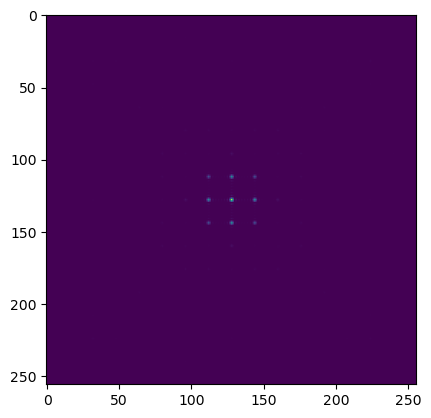

In [ ]:
import tensorflow as tf

image_data = tf.cast(img, tf.float32)
image_data = image_data/255.0
# Create a tensor with your image data
f = tf.complex(tf.zeros((tf.shape(image_data))), image_data)

# Perform Fourier Transform
f = tf.signal.fft2d(f)
print(f)
# Shift the zero frequency component to the center of the spectrum
f_shifted = tf.signal.fftshift(f)

# Calculate the magnitude spectrum and normalize it to values between 0 and 255
magnitude_spectrum = tf.math.square(tf.math.abs(f_shifted))
# magnitude_spectrum_normalized = tf.image.per_image_standardization(magnitude_spectrum)

# Display the magnitude spectrum
import matplotlib.pyplot as plt
plt.imshow(magnitude_spectrum.numpy())
plt.show()


In [ ]:
for i in 

In [2]:
data = tifffile.imread('/nsls2/data/staff/xyang4/data/diffraction_ruipeng/SAXS_Au_SL_s3_scan1_id841_x1.145_y21.50015saxs.tiff')

In [3]:
mask = tifffile.imread('/nsls2/data/staff/xyang4/data/diffraction_ruipeng/Pilatus1M_custom-mask.tif')

In [4]:
data1  = data[512-128:512+128, 248-128:248+128]
mask2 = mask[512-128:512+128, 248-128:248+128]
print(data.shape, data1.shape)

(1043, 981) (256, 256)


In [8]:
data1 = np.load('/data/diffraction_ruipeng/x_scale.npy')
print(data1)

0.0007082688570101553


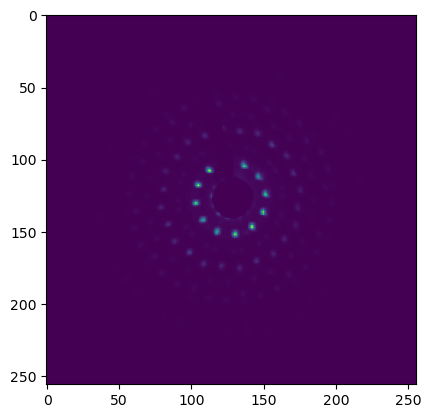

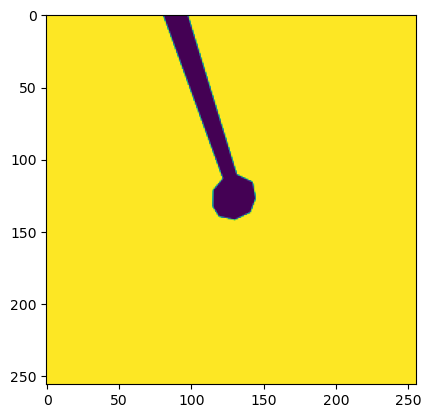

In [5]:
plt.imshow(data1)
plt.show()
plt.imshow(mask2)
plt.show()


In [12]:
tifffile.imwrite('/nsls2/data/staff/xyang4/data/diffraction_ruipeng/data_crop_nor.tiff', data1)
tifffile.imwrite('/nsls2/data/staff/xyang4/data/diffraction_ruipeng/mask_crop_nor.tiff', mask2)

In [3]:
import numpy as np
import cv2

# Generate 256x256 grayscale image
img = np.zeros((256, 256), dtype=np.uint8)

# Set diameter and radius of sphere
diameter = 8
radius = diameter // 2

# Draw 16x16 spheres
for i in range(16):
    for j in range(16):
        # Calculate center of sphere
        center = ((i+1)*16 - 8, (j+1)*16 - 8)
        
        # Generate mask for sphere
        mask = np.zeros((256, 256), dtype=np.uint8)
        cv2.circle(mask, center, radius, 255, -1)
        
        # Add mask to image
        img = cv2.add(img, mask)
# tifffile.imwrite('/nsls2/data/staff/xyang4/data/diffraction_ruipeng/sim_circles.tif', img)      
# Display image
# cv2.imshow('Image', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
tifffile.imwrite('/nsls2/data/staff/xyang4/data/diffraction_ruipeng/sim_circles.tif', img)

# Save image as TIFF file


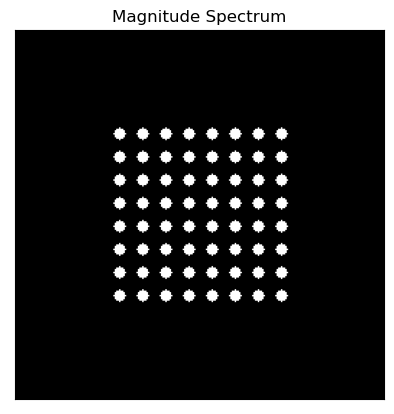

(799680+0j) (-581981.6891156639+0j)


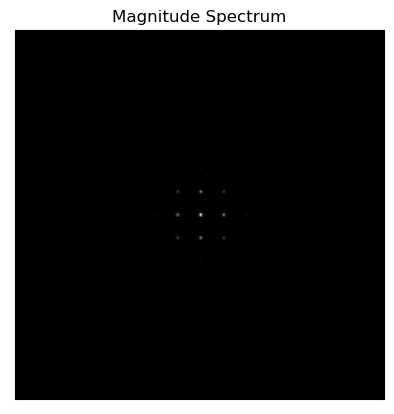

In [3]:

import numpy as np
import cv2
import matplotlib.pyplot as plt

# Generate the image with spheres using the code from the previous example


# Initialize a black image of size 128 by 128
img = np.zeros((128, 128), dtype=np.uint8)

# Draw 8*8 spheres with a diameter of 8 pixels
diameter = 8
radius = diameter // 2
for i in range(8):
    for j in range(8):
        center = ((i+1)*16 - 8, (j+1)*16 - 8)
        mask = np.zeros((128, 128), dtype=np.uint8)
        cv2.circle(mask, center, radius, 255, -1)
        img = cv2.add(img, mask)

# Pad the image to size 256 by 256
img = cv2.copyMakeBorder(img, 64, 64, 64, 64, cv2.BORDER_CONSTANT, value=0)
plt.imshow(img, cmap='gray')
# plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()
tifffile.imwrite('/nsls2/data/staff/xyang4/data/diffraction_ruipeng/sim_circles.tif', img)


# Compute 2D Fourier transform
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
fft_img = (np.abs(fshift))**2
# magnitude_spectrum = np.log(np.abs(fshift))
print(fshift.max(), fshift.min())
# Display magnitude spectrum
plt.imshow(fft_img, cmap='gray')
# plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()
tifffile.imwrite('/nsls2/data/staff/xyang4/data/diffraction_ruipeng/sim_fft.tif', fft_img)


In [9]:
data = tifffile.imread('/nsls2/data/staff/xyang4/data/diffraction_ruipeng/test.tiff')
data = complex(0, data)
f = np.fft.fft2(data)
fshift = np.fft.fftshift(f)
fft_img = (np.abs(fshift))**2
plt.imshow(fft_img, cmap='gray')
# plt.imshow(magnitude_spectrum, cmap='gray')
# plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

TypeError: only size-1 arrays can be converted to Python scalars

In [6]:
tifffile.imwrite('/nsls2/data/staff/xyang4/data/diffraction_ruipeng/data_fft.tif', fft_img)

tf.Tensor(
[[ 0.0000000e+00+3136.j       2.2264750e-05-2006.9552j
   0.0000000e+00   +0.j      ...  2.7772541e-05 +698.11426j
   0.0000000e+00   +0.j      -1.0768243e-05-2006.9551j ]
 [-5.6184326e-05-2006.9556j  -9.9926274e-06+1284.3965j
   0.0000000e+00   +0.j      ... -2.8981940e-05 -446.7721j
   0.0000000e+00   +0.j       3.8348408e-06+1284.3965j ]
 [ 0.0000000e+00   +0.j       0.0000000e+00   +0.j
   0.0000000e+00   +0.j      ...  0.0000000e+00   +0.j
   0.0000000e+00   +0.j       0.0000000e+00   +0.j     ]
 ...
 [ 1.1060868e-05 +698.11426j -5.4934626e-06 -446.77203j
   0.0000000e+00   +0.j      ...  1.3999386e-05 +155.40237j
   0.0000000e+00   +0.j       5.0130293e-06 -446.772j  ]
 [ 0.0000000e+00   +0.j       0.0000000e+00   +0.j
   0.0000000e+00   +0.j      ...  0.0000000e+00   +0.j
   0.0000000e+00   +0.j       0.0000000e+00   +0.j     ]
 [ 5.8149319e-05-2006.9553j  -2.5600180e-05+1284.3964j
   0.0000000e+00   +0.j      ... -8.2000997e-06 -446.7721j
   0.0000000e+00   +0.j     

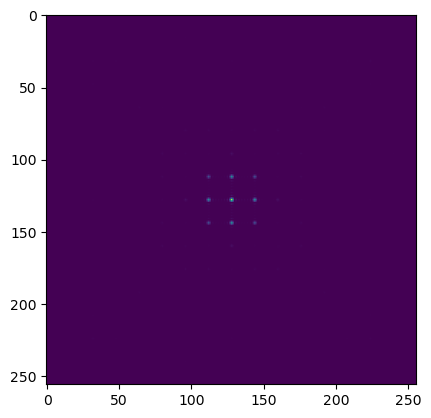

In [15]:
import tensorflow as tf

image_data = tf.cast(img, tf.float32)
image_data = image_data/255.0
# Create a tensor with your image data
f = tf.complex(tf.zeros((tf.shape(image_data))), image_data)

# Perform Fourier Transform
f = tf.signal.fft2d(f)
print(f)
# Shift the zero frequency component to the center of the spectrum
f_shifted = tf.signal.fftshift(f)

# Calculate the magnitude spectrum and normalize it to values between 0 and 255
magnitude_spectrum = tf.math.square(tf.math.abs(f_shifted))
# magnitude_spectrum_normalized = tf.image.per_image_standardization(magnitude_spectrum)

# Display the magnitude spectrum
import matplotlib.pyplot as plt
plt.imshow(magnitude_spectrum.numpy())
plt.show()


(3198720+0j) (-2327926.7564626555+0j)


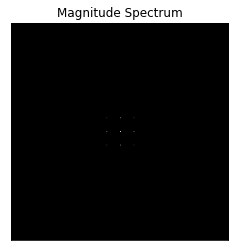

In [ ]:

import numpy as np
import cv2
import matplotlib.pyplot as plt

# Generate the image with spheres using the code from the previous example
img = np.zeros((256, 256), dtype=np.uint8)
diameter = 8
radius = diameter // 2
for i in range(16):
    for j in range(16):
        center = ((i+1)*16 - 8, (j+1)*16 - 8)
        mask = np.zeros((256, 256), dtype=np.uint8)
        cv2.circle(mask, center, radius, 255, -1)
        img = cv2.add(img, mask)

# Compute 2D Fourier transform
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
fft_img = (np.abs(fshift))**2
# magnitude_spectrum = np.log(np.abs(fshift))
print(fshift.max(), fshift.min())
# Display magnitude spectrum
plt.imshow(fft_img, cmap='gray')
# plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()
tifffile.imwrite('/nsls2/data/staff/xyang4/data/diffraction_ruipeng/sim_fft.tif', fft_img)


In [11]:
wf = tf.complex(absorption, phase)
    # wf = tf.complex(phase, absorption)

    # wf = mask_img(wf)
    # wf = tf.multiply(ampl, tf.exp(phshift))
    # wf = tf.manip.roll(wf, [160, 160], [0, 1])
    ifp = tf.square(tf.abs(tf.signal.fft2d(wf)))
    # ifp = tf.roll(ifp, [256, 256], [0, 1])
    ifp = tf.reshape(ifp, [1, ifp.shape[0], ifp.shape[1], 1])
    ifp = tf.image.per_image_standardization(ifp)
    ifp = tfnor_phase(ifp)

# Tomography reconstruction

In [12]:
import numpy as np
import tomopy
import tifffile
import matplotlib.pyplot as plt
from pathlib import Path
import os

In [3]:
fpath = '/nsls2/data/staff/xyang4/data/diffraction_ruipeng/RLi_sbcc_saxs/crop_bin_recon_test/'
spath = '/nsls2/data/staff/xyang4/data/diffraction_ruipeng/RLi_sbcc_saxs/crop_bin_tomo/'

In [14]:
def list_files(directory):
    path = Path(directory)
    for file_path in path.rglob('*'):
        yield file_path

def save_tiff(image, filename):
    # Extract the directory from the filename
    directory = os.path.dirname(filename)

    # Check if the directory exists, and create it if it doesn't
    if not os.path.exists(directory):
        os.makedirs(directory)
    image = nor_diff(image)
    image = np.array(image, dtype = np.float32)
    # Save the image
    tifffile.imwrite(filename, image)
    
def nor_diff(img):
 
    # img = np.log(img+2)
    mean_tmp = np.mean(img)
    std_tmp = np.std(img)
    img = (img - mean_tmp) / std_tmp
    img = (img - img.min()) / (img.max() - img.min())
    return img

In [7]:
data = []
for file_name in list_files(fpath):
    data_tmp = tifffile.imread(file_name)
    data.append(data_tmp)
data = np.array(data)
print(data.shape)

(962, 256, 256)


In [22]:
data_ang = data[:361]

In [28]:
ang = tomopy.angles(361, ang1 = 0, ang2 = 180)

recon = tomopy.recon(data_ang, ang, algorithm='gridrec', filter_name='parzen')


[0.         0.00872665 0.01745329 0.02617994 0.03490659 0.04363323
 0.05235988 0.06108652 0.06981317 0.07853982 0.08726646 0.09599311
 0.10471976 0.1134464  0.12217305 0.13089969 0.13962634 0.14835299
 0.15707963 0.16580628 0.17453293 0.18325957 0.19198622 0.20071286
 0.20943951 0.21816616 0.2268928  0.23561945 0.2443461  0.25307274
 0.26179939 0.27052603 0.27925268 0.28797933 0.29670597 0.30543262
 0.31415927 0.32288591 0.33161256 0.3403392  0.34906585 0.3577925
 0.36651914 0.37524579 0.38397244 0.39269908 0.40142573 0.41015237
 0.41887902 0.42760567 0.43633231 0.44505896 0.45378561 0.46251225
 0.4712389  0.47996554 0.48869219 0.49741884 0.50614548 0.51487213
 0.52359878 0.53232542 0.54105207 0.54977871 0.55850536 0.56723201
 0.57595865 0.5846853  0.59341195 0.60213859 0.61086524 0.61959188
 0.62831853 0.63704518 0.64577182 0.65449847 0.66322512 0.67195176
 0.68067841 0.68940505 0.6981317  0.70685835 0.71558499 0.72431164
 0.73303829 0.74176493 0.75049158 0.75921822 0.76794487 0.77667

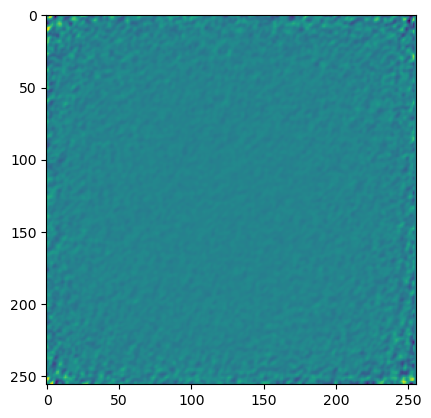

In [29]:
plt.imshow(recon[100,:,:])
plt.show()

In [30]:
save_tiff(recon, spath+'recon_test_180_filter.tiff')